In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import sklearn.linear_model as LM
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

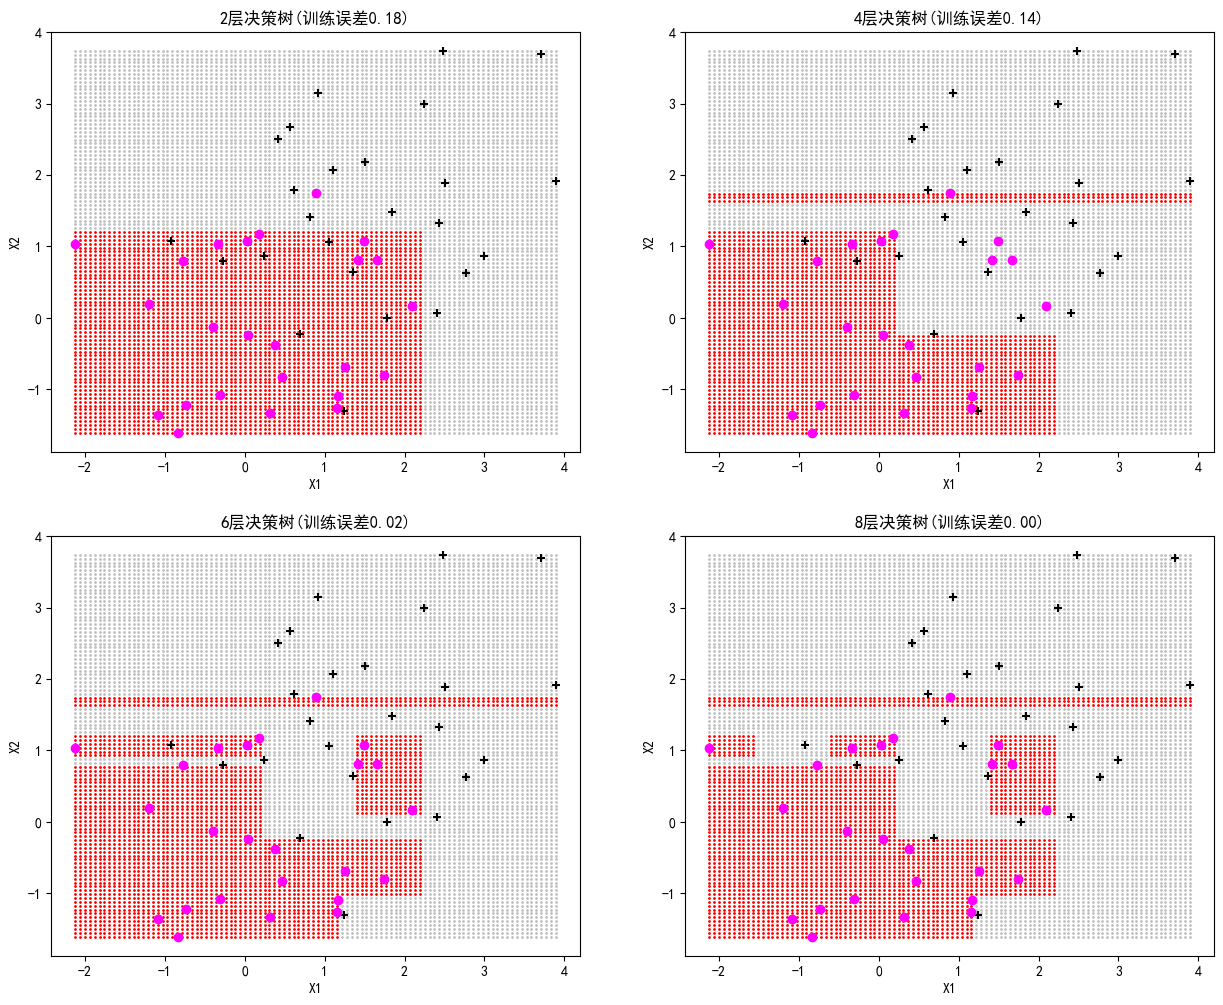

In [2]:
np.random.seed(123)
N=50
n=int(0.5*N)
X=np.random.normal(0,1,size=100).reshape(N,2)
Y=[0]*n+[1]*n
X[0:n]=X[0:n]+1.5
X1,X2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),100), np.linspace(X[:,1].min(),X[:,1].max(),100))
data=np.hstack((X1.reshape(10000,1),X2.reshape(10000,1)))

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
for K,H,L in [(2,0,0),(4,0,1),(6,1,0),(8,1,1)]:
    modelDTC = tree.DecisionTreeClassifier(max_depth=K,random_state=123)
    modelDTC.fit(X,Y)
    Yhat=modelDTC.predict(data)    
    for k,c in [(0,'silver'),(1,'red')]:
        axes[H,L].scatter(data[Yhat==k,0],data[Yhat==k,1],color=c,marker='o',s=1)
    axes[H,L].scatter(X[:n,0],X[:n,1],color='black',marker='+')
    axes[H,L].scatter(X[(n+1):N,0],X[(n+1):N,1],color='magenta',marker='o')
    axes[H,L].set_xlabel("X1")
    axes[H,L].set_ylabel("X2")
    axes[H,L].set_title("%d层决策树(训练误差%.2f)"%((K,1-modelDTC.score(X,Y))))


说明：1、基于图3.2的模拟数据，采用不同树深度的决策树进行分类预测。直观展示对2维空间划分所形成的多个分类边界。
2、左上图是树深度为2时的分类边界，整体上分类边界比较规则，训练误差18%较高。
3、右上图和左下图是树深度为4和6时的分类边界。可见，区域划分更加细致，分类边界增加且整体上逐渐复杂，训练误差分别为14%和2%。
4、由下图是树深度为8时的区域划分情况。可见，区域划分进一步细致，整体上分类边界复杂，训练误差降至0.0%。